# Computer Vision Bootcamp: Assignment 3

In [1]:
# Import the needed libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Operational Functions

In [11]:
def read_images(images_paths:dict) -> dict:
    """
    Reads images from the given paths and converts them to the RGB color space.
    This function takes a dictionary where the keys are image names and the values are paths to images,it
     returns a new dictionary with the same keys but with the images converted to RGB.

    Args:
        - images_paths (dict): a dictionary with image names as keys and image file paths as values.

    Returns:
        - dict: a dictionary where keys are image names, and values are the images in the RGB color space.

    """
    images = {}
    for name, path in images_paths.items():
        images[name] = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    return images

In [ ]:
def plot_images(images:dict, figure_title:str) -> None:
    """
    Plots multiple images in a single figure.

    Given a dictionary of images, where keys are image names and values are the image in RGB,
    this function displays all images in a single row with their titles.

    Args:
        - images (dict): A dictionary of image data, where keys are image names and values are RGB images.
        - figure_title (str): The title for figure.

    Returns:
        - None: This function only displays the images.
    """
    number_of_images = len(images)
    plt.figure(figsize=(5*number_of_images, 5))

    for idx, (name, img) in enumerate(images.items(), start=1):
        plt.subplot(1, number_of_images, idx)
        title = name.replace('_', ' ').title()
        plt.title(title)
        plt.imshow(img)

    plt.suptitle(figure_title)
    plt.show()

In [ ]:
def stitch_image(imgs_list: list, show_result: True=bool)->None:
    """
    This function stitches a list of images together and optionally displays the result.
    It takes a list of images and attempts to stitch them together using OpenCV's
    `Stitcher_create` function. If the stitching is successful, the status is printed, and
    the result is shown in a plot if `show_result` is set to `True`. If the stitching fails,
    it will print an error message with the failure status.

    Args:
      - imgs_list (list): A list of images to be stitched together.
      - show_result (bool, optional): A flag indicating whether to display the stitched image.

    Returns:
      - None
    """
    # define and use the stitcher
    stitcher = cv2.Stitcher_create()
    status, result = stitcher.stitch(imgs_list)

    # Show the stitiched (result) image
    if status == 0:
      # print the status of the operation
      print(f'Stitching status: {status}')
      if show_result:
          plot_images({"Stitched Image": result}, "Stitching Result")
    else:
      print(f'Image stitching failed, status is {status}')

## Reading

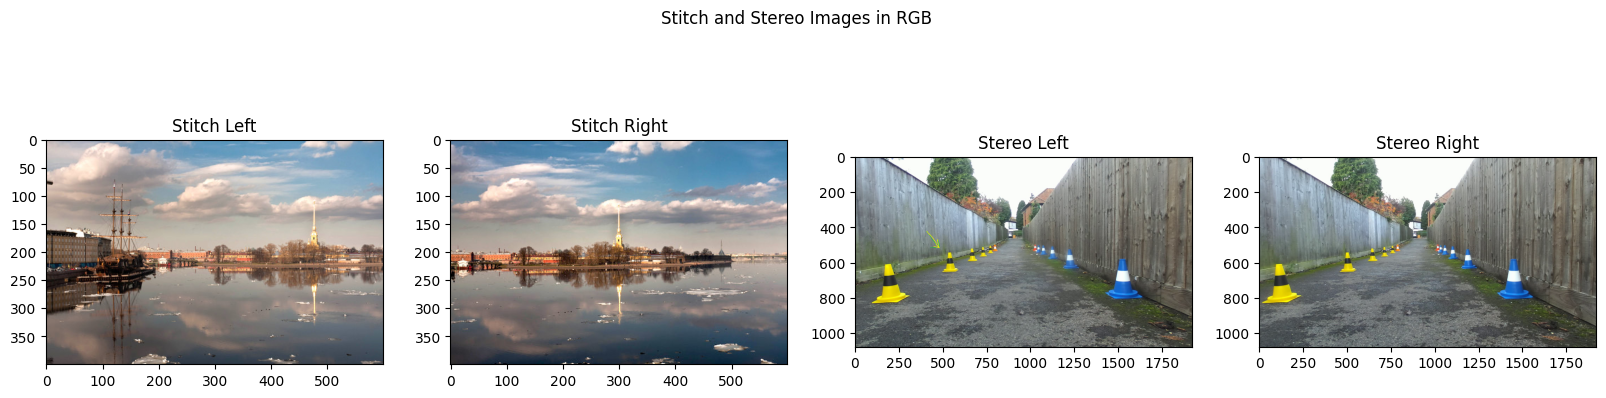

In [12]:
# Read the images and show them in one figure in RGB
images_paths = {
    'stitch_left' : 'stitch_left.jpg',
    'stitch_right' : 'stitch_right.jpg',
    'stereo_left' : 'stereo_left.png',
    'stereo_right' : 'stereo_right.png'
}

images = read_images(images_paths)  # Read images in RGB

plot_images(images, "Stitch and Stereo Images in RGB")  # P;ot images in one figure

## Image Stitching

Stitching status: 0


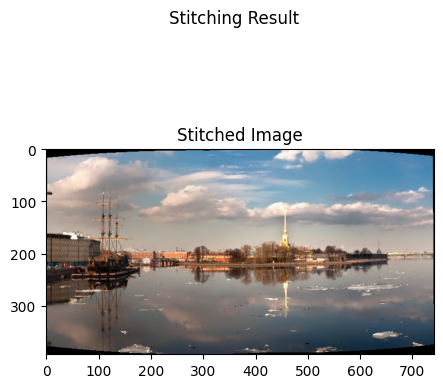

In [23]:
stitch_image([images['stitch_left'], images['stitch_right']])

Stitching status: 0


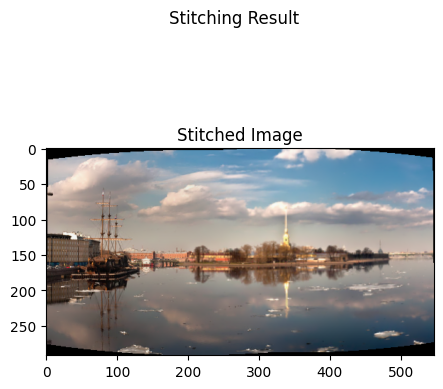

In [25]:
# use the scaling function, scale the right image by a factor of 0.5 and show the results of stitching it with the unchanged left image (if there is a result)
scaled_stitch_right = cv2.resize(images['stitch_right'], dsize=None, fx=0.5, fy=0.5)
stitch_image([images['stitch_left'], scaled_stitch_right])



Stitching status: 0


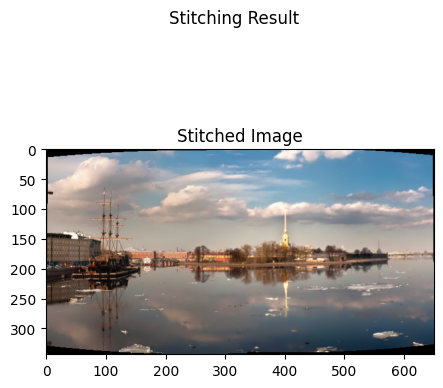

In [26]:
# use the scaling function, scale the right image by a factor of 0.75 and show the results of stitching it with the unchanged left image (if there is a result)
scaled_stitch_right = cv2.resize(images['stitch_right'], dsize=None, fx=0.75, fy=0.75)
stitch_image([images['stitch_left'], scaled_stitch_right])

## Depth

<ipython-input-32-46ab142091e3>:19: RuntimeWarning: divide by zero encountered in divide
  depth = focal_length * baseline / disparity


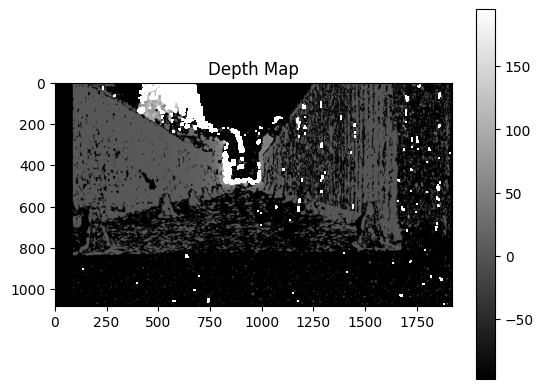

In [32]:
# convert both images to a suitable colour space
images['gray_stereo_left'] = cv2.cvtColor(images['stereo_left'], cv2.COLOR_RGB2GRAY)
images['gray_stereo_right'] = cv2.cvtColor(images['stereo_right'], cv2.COLOR_RGB2GRAY)

# Define and use the stereo function
stereo = cv2.StereoBM_create(
    numDisparities=16*5,
    blockSize=15
    )
disparity = stereo.compute(
    images['gray_stereo_left'],
    images['gray_stereo_right']
    )

# Using a focal length of 13000 and a baseline of 120mm, find the depth in meters
focal_length = 13000
baseline = 120 * 0.001  # Convert mm to meter
disparity[disparity == 0] = 0.1
depth = focal_length * baseline / disparity

# show the depth map
plt.imshow(depth, cmap='gray')
plt.title('Depth Map')
plt.colorbar()
plt.show()

What is the depth of the cone with the yellow arrow in the left image?

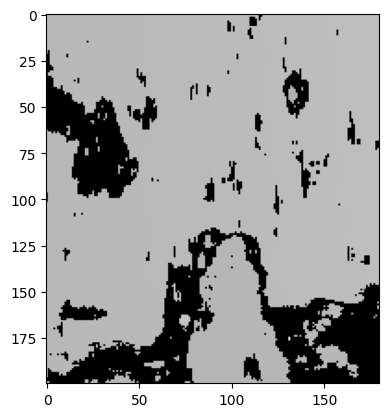

In [37]:
# In this task, I will crop the cone from the image to better estimate an index from it.
plt.imshow(depth[420:620, 440:620], cmap='gray')
plt.show()

In [40]:
print(f'cone depth: {depth[570][540]}')

cone depth: 2.689655172413793
